In [1]:
#!pip install selenium
#!pip install webdriver_manager
from selenium import webdriver

import os
from selenium.webdriver.chrome.service import Service

from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

import codecs
from selenium.webdriver.common.keys import Keys
import re

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select

In [2]:
website = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
driver = webdriver.Chrome()
driver.get(website)

In [3]:
next_page = driver.find_element(By.LINK_TEXT, 'Next »')
for x in driver.find_elements(By.XPATH,'//*[@id="main"]/div/div[4]/span[1]'):
    end = int(x.text.split(' ')[2].replace(',',''))

rang = []
film = []
jahr = []
fsk = []
dauer = []
genre = []
bewertung = []
regisseur = []
stars = []

while next_page:
    movie_info = driver.find_elements(By.XPATH, '//div[@class="lister-item-content"]')
    for info in movie_info:
        # Split the text into lines and select the second line
        lines = info.text.split('\n')
        header = lines[0].split(' ')
        rang.append(header[0])
        jahr.append(header[-1])
        film.append(header[1:-1])

        if len(lines[1].split('|')) == 3:
            fsk.append(lines[1].split('|')[0])
            dauer.append(lines[1].split('|')[1])
            genre.append(lines[1].split('|')[2])
        elif len(lines[1].split('|')) == 2:
            fsk.append('NaN')
            dauer.append(lines[1].split('|')[0])
            genre.append(lines[1].split('|')[1])

        bewertung.append(lines[2].split(' ')[0])

        staff = lines[-2].split(" | ")
        # Iterating through the list and replacing 'Director:' with an empty string
        for i in range(len(staff)):
            staff[i] = staff[i].replace('Director: ', '')
            staff[i] = staff[i].replace('Stars: ', '')
        # Append the duration to the list
        regisseur.append(staff[0])
        stars.append(staff[-1])

    if len(rang) == end:
        break
    next_page = driver.find_element(By.LINK_TEXT, 'Next »')
    next_page.click()

driver.quit()

# lists to dataframe
import pandas as pd
df = pd.DataFrame()
df['rang'] = rang
df['film'] = film
df['jahr'] = jahr
df['fsk'] = fsk
df['dauer'] = dauer
df['genre'] = genre
df['bewertung'] = bewertung
df['regisseur'] = regisseur
df['stars'] = stars
df

,rang,film,jahr,fsk,dauer,genre,bewertung,regisseur,stars
0,1.,"[Die, Verurteilten]",(1994),12,142 min,Drama,"9,3",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2.,"[Der, Pate]",(1972),16,175 min,"Crime, Drama","9,2",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,3.,"[The, Dark, Knight]",(2008),16,152 min,"Action, Crime, Drama","9,0",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,4.,"[Schindlers, Liste]",(1993),12,195 min,"Biography, Drama, History","9,0",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,5.,"[Der, Herr, der, Ringe:, Die, Rückkehr, des, K...",(2003),12,201 min,"Action, Adventure, Drama","9,0",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
...,...,...,...,...,...,...,...,...,...
995,996.,[Control],(2007),12,122 min,"Biography, Drama, Music","7,6",Anton Corbijn,"Sam Riley, Samantha Morton, Craig Parkinson, A..."
996,997.,"[Philomena:, Eine, Mutter, sucht, ihren, Sohn]",(2013),6,98 min,"Biography, Comedy, Drama","7,6",Stephen Frears,"Judi Dench, Steve Coogan, Sophie Kennedy Clark..."
997,998.,"[Shine, -, Der, Weg, ins, Licht]",(1996),12,105 min,"Biography, Drama, Music","7,6",Scott Hicks,"Geoffrey Rush, Armin Mueller-Stahl, Justin Bra..."
998,999.,"[Der, Unsichtbare]",(1933),16,71 min,"Horror, Sci-Fi","7,6",James Whale,"Claude Rains, Gloria Stuart, William Harrigan,..."


In [4]:
df1 = df.copy()
df1.rang = df1.rang.str.replace('.','')
#from film remove the brackets and commas regex
df1.film = df1['film'].str.join(' ')
df1.jahr = df1.jahr.str[1:-1]
df1.dauer = df1.dauer.str.replace('min','')
#df1['jahr'] = pd.to_datetime(df1['jahr'], format='%Y')
df1.head()

,rang,film,jahr,fsk,dauer,genre,bewertung,regisseur,stars
0,1,Die Verurteilten,1994,12,142,Drama,"9,3",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2,Der Pate,1972,16,175,"Crime, Drama","9,2",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,3,The Dark Knight,2008,16,152,"Action, Crime, Drama","9,0",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,4,Schindlers Liste,1993,12,195,"Biography, Drama, History","9,0",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,5,Der Herr der Ringe: Die Rückkehr des Königs,2003,12,201,"Action, Adventure, Drama","9,0",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."


In [5]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rang          0
film          0
jahr          0
fsk          64
dauer         0
genre         0
bewertung     0
regisseur     0
stars         0
dtype: int64


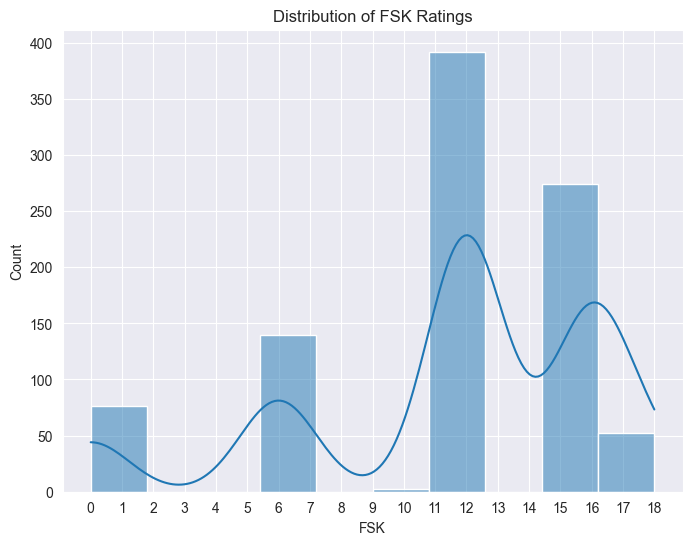

              fsk
count  936.000000
mean    11.628205
std      4.863771
min      0.000000
25%     12.000000
50%     12.000000
75%     16.000000
max     18.000000


In [6]:
# Convert 'fsk' column to numeric (int) data type
df1['fsk'] = pd.to_numeric(df1['fsk'], errors='coerce')

# Check for missing values (NaN)
missing_values = df1.isnull().sum()
print(missing_values)

# Perform EDA
# Example: Plotting the distribution of 'fsk'
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='fsk', bins=10, kde=True)
plt.title('Distribution of FSK Ratings')
plt.xlabel('FSK')
plt.ylabel('Count')

# Set x-axis tick positions and labels
xticks = np.arange(0, df1['fsk'].max() + 1, 1)  # Adjust the step size if needed
plt.xticks(xticks)

plt.show()

# Print the summary statistics of numeric columns
print(df1.describe())


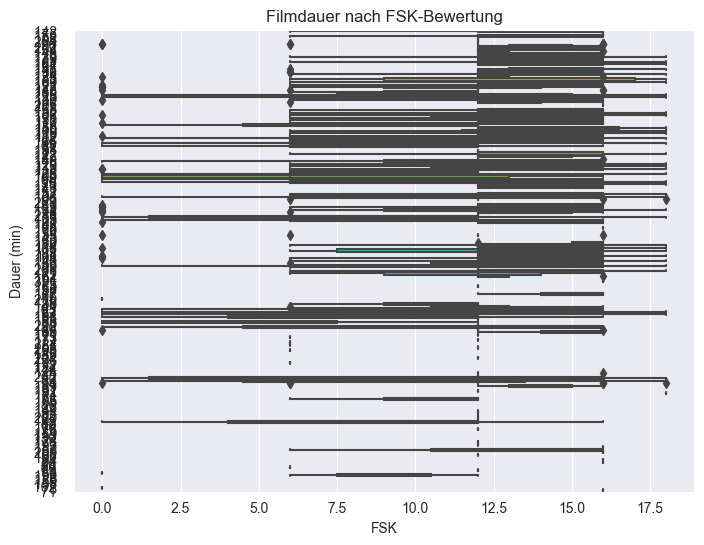

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='fsk', y='dauer')
plt.title('Filmdauer nach FSK-Bewertung')
plt.xlabel('FSK')
plt.ylabel('Dauer (min)')
plt.show()

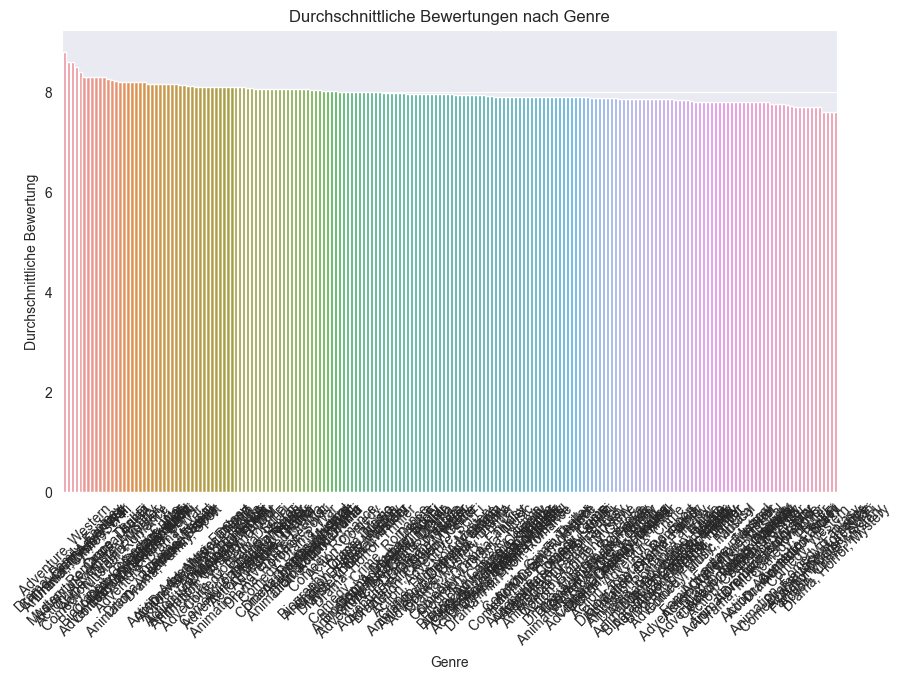

In [8]:
plt.figure(figsize=(10, 6))
df1['bewertung'] = df1['bewertung'].str.replace(',', '.').astype(float)  # Convert 'bewertung' to float
avg_ratings_by_genre = df1.groupby('genre')['bewertung'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings_by_genre.index, y=avg_ratings_by_genre.values)
plt.title('Durchschnittliche Bewertungen nach Genre')
plt.xlabel('Genre')
plt.ylabel('Durchschnittliche Bewertung')
plt.xticks(rotation=45)
plt.show()


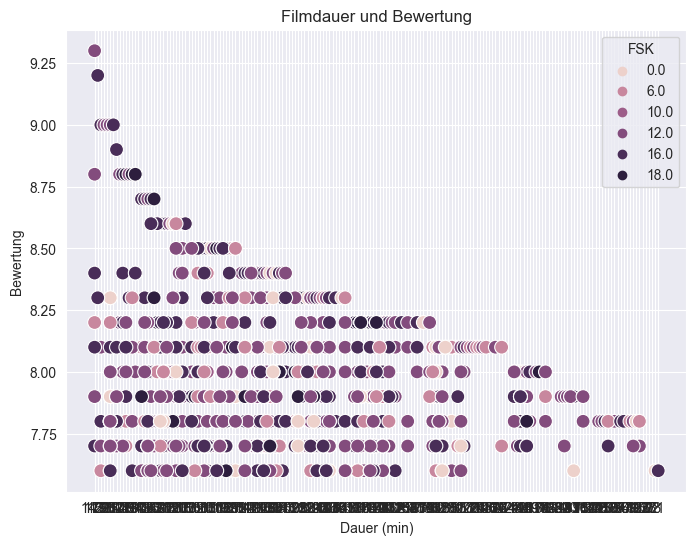

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='dauer', y='bewertung', hue='fsk', s=100)
plt.title('Filmdauer und Bewertung')
plt.xlabel('Dauer (min)')
plt.ylabel('Bewertung')
plt.legend(title='FSK')
plt.show()


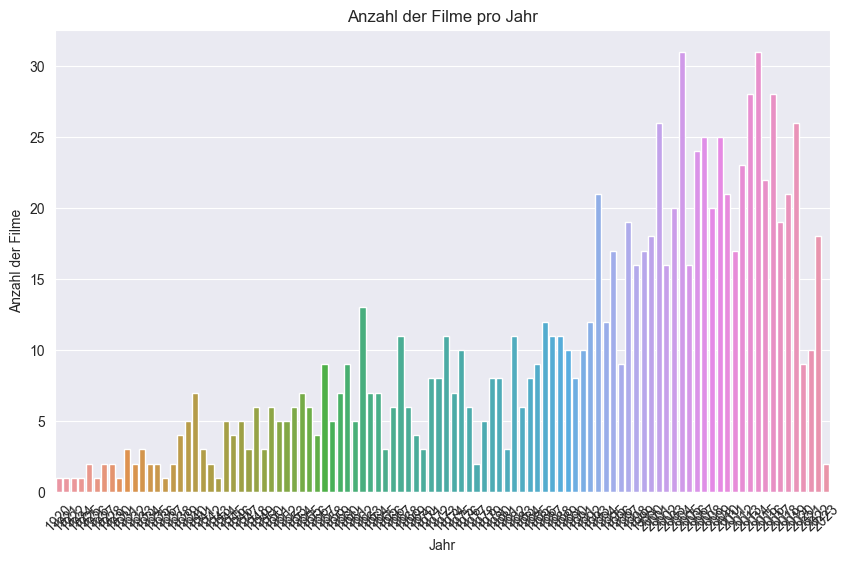

In [10]:
plt.figure(figsize=(10, 6))
film_count_by_year = df1['jahr'].value_counts().sort_index()
sns.barplot(x=film_count_by_year.index, y=film_count_by_year.values)
plt.title('Anzahl der Filme pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=90)
plt.show()
